<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_ARIMA_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/co2.csv')
df.head()

,Date,time,CO2
0,1981-05-01,0,342.74
1,1981-06-01,1,342.08
2,1981-07-01,2,340.32
3,1981-08-01,3,338.26
4,1981-09-01,4,336.52


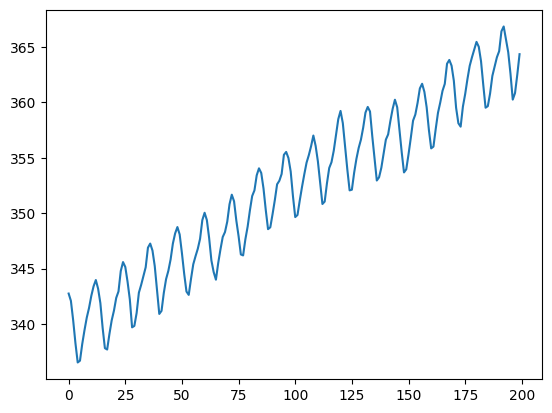

In [ ]:
plt.plot(df.CO2)
plt.show()

# Exercício: Construa o melhor model `ARIMA(p,d,q)`

## 1. Explore os dados

* Decomposição T+S+R

In [ ]:
df.index = pd.to_datetime(df.Date)
df.drop(['Date','time'], axis=1, inplace=True)
df.head()

,CO2
Date,
1981-05-01,342.74
1981-06-01,342.08
1981-07-01,340.32
1981-08-01,338.26
1981-09-01,336.52


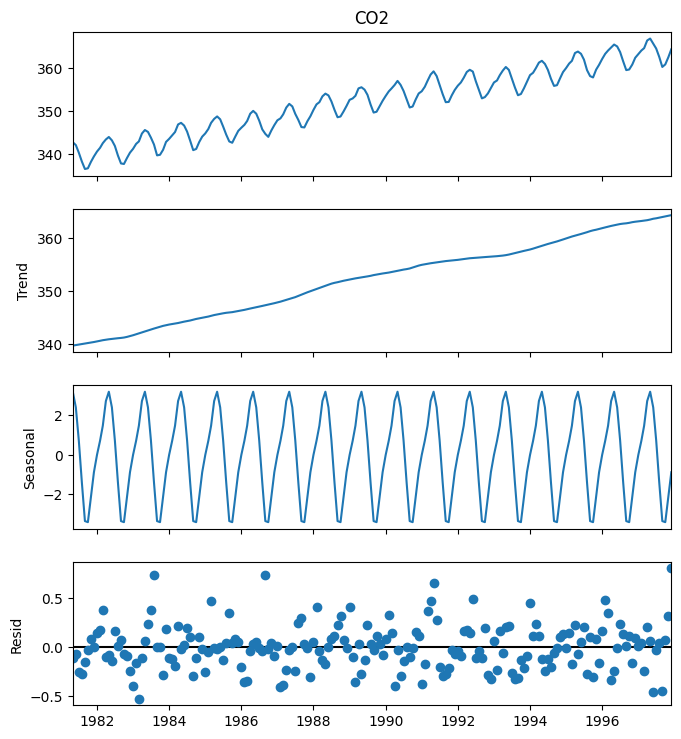

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['CO2'], model='additive', extrapolate_trend=1)

fig = result.plot()
fig.set_size_inches((7, 8))
plt.show()

## 2. Verificar a Estacionariedade (`d`)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Realiza o teste ADF
result = adfuller(df['CO2'])

# Imprime os resultados
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpreta os resultados
if result[1] <= 0.05:
    print("A série temporal é estacionária.")
else:
    print("A série temporal não é estacionária.")

ADF Statistic: -0.383559
p-value: 0.912808
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
A série temporal não é estacionária.


In [ ]:
df['CO2'].diff()

,CO2
Date,
1981-05-01,NaN
1981-06-01,-0.66
1981-07-01,-1.76
1981-08-01,-2.06
1981-09-01,-1.74
...,...
1997-08-01,-1.95
1997-09-01,-2.33
1997-10-01,0.59


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Realiza o teste ADF
result = adfuller(df['CO2'].diff().dropna())

# Imprime os resultados
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpreta os resultados
if result[1] <= 0.05:
    print("A série temporal é estacionária.")
else:
    print("A série temporal não é estacionária.")

ADF Statistic: -3.259019
p-value: 0.016813
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575
A série temporal é estacionária.


## 3. Verificar os Parâmetros PACF e ACF (`p`, `q`)

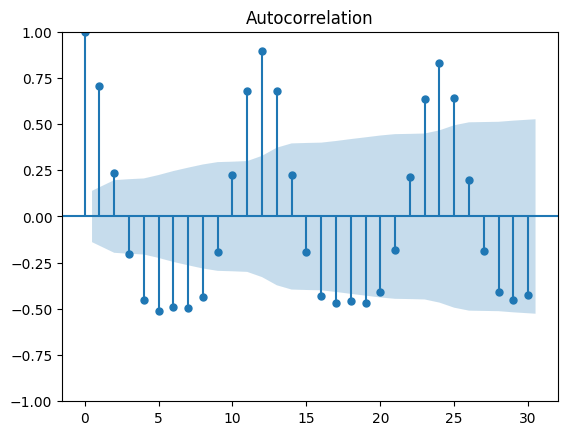

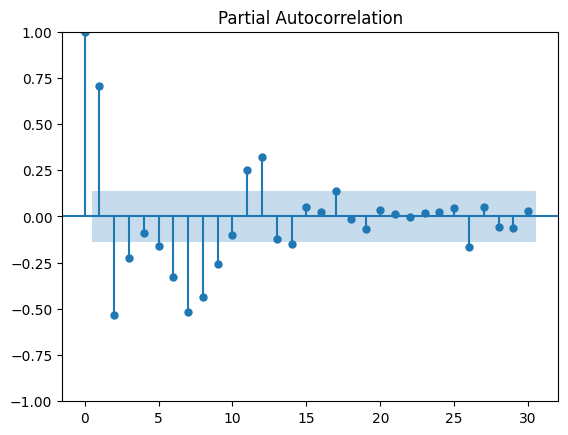

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plota a função de autocorrelação (ACF)
plot_acf(df['CO2'].diff().dropna(), lags=30)
plt.show()

# Plota a função de autocorrelação parcial (PACF)
plot_pacf(df['CO2'].diff().dropna(), lags=30)
plt.show()

## 4. Construa o modelo

* Obtenha o AIC
* Summary

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


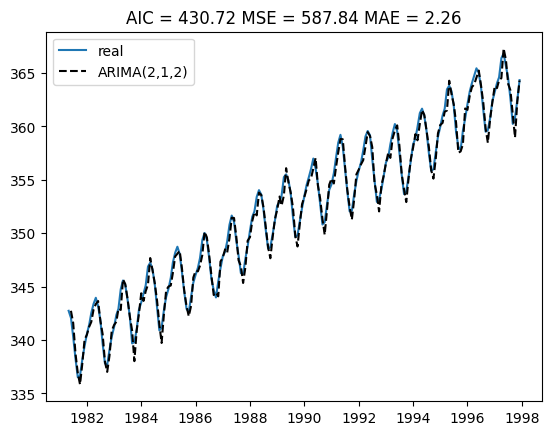

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p = 2; d = 1; q = 2
model = ARIMA(df, order=(p, d, q))
results = model.fit(method_kwargs={'maxiter':700})

plt.plot(df,label='real')
plt.plot(results.fittedvalues[1::], 'k--', label='ARIMA(' + str(p) + ',' + str(d) + ',' + str(q) + ')')
plt.title(f'AIC = {results.aic:.2f} MSE = {results.mse:.2f} MAE = {results.mae:.2f}')

plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


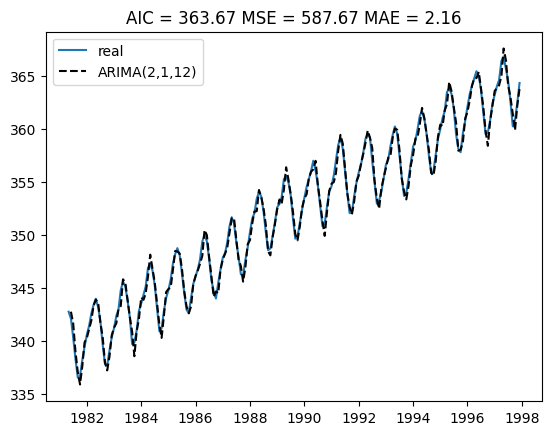

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p = 2; d = 1; q = 12
model = ARIMA(df, order=(p, d, q))
results = model.fit(method_kwargs={'maxiter':700})

plt.plot(df,label='real')
plt.plot(results.fittedvalues[1::], 'k--', label='ARIMA(' + str(p) + ',' + str(d) + ',' + str(q) + ')')
plt.title(f'AIC = {results.aic:.2f} MSE = {results.mse:.2f} MAE = {results.mae:.2f}')

plt.legend()
plt.show()

In [ ]:
results.fittedvalues[0:10]

,0
Date,
1981-05-01,0.000000
1981-06-01,342.740220
1981-07-01,341.644360
1981-08-01,338.956783
1981-09-01,337.028325
1981-10-01,335.868967
1981-11-01,337.633586
1981-12-01,339.845350
1982-01-01,340.270127


In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  200
Model:                ARIMA(2, 1, 12)   Log Likelihood                -166.833
Date:                Wed, 06 Nov 2024   AIC                            363.665
Time:                        21:33:19   BIC                            413.065
Sample:                    05-01-1981   HQIC                           383.659
                         - 12-01-1997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1991      0.124      9.704      0.000       0.957       1.441
ar.L2         -0.6036      0.116     -5.226      0.000      -0.830      -0.377
ma.L1         -0.5903      1.112     -0.531      0.5

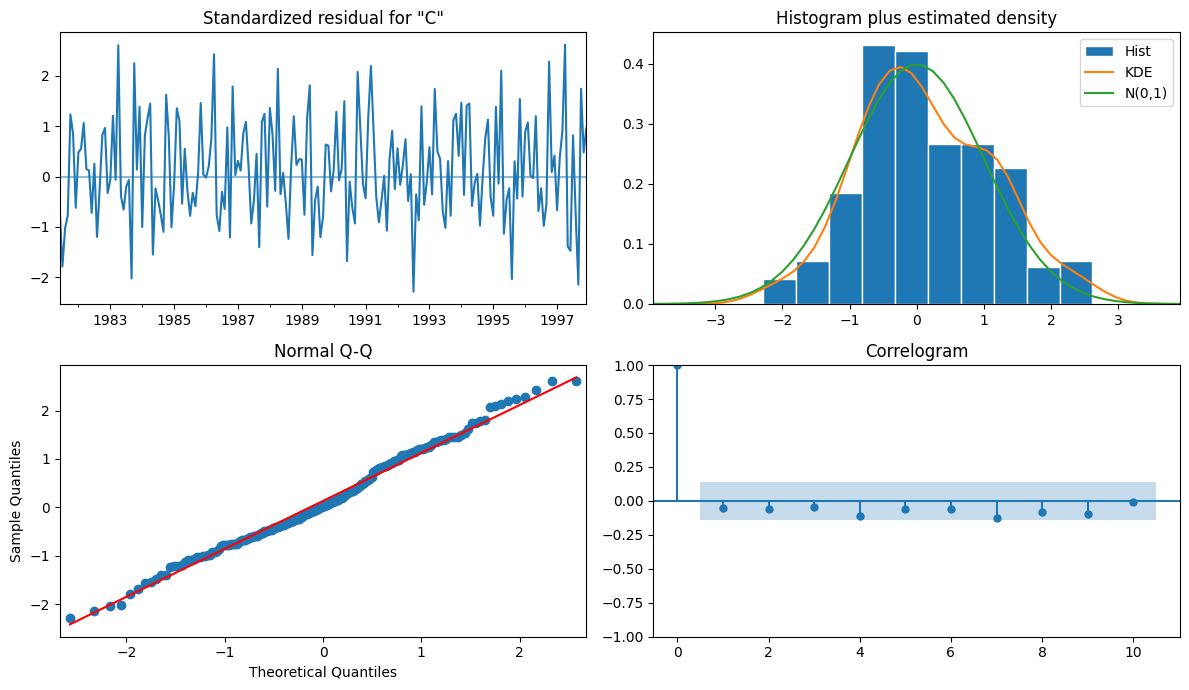

In [ ]:
fig = plt.figure(figsize=(12,7))

results.plot_diagnostics(fig=fig)

plt.tight_layout()
plt.show()

## 5. Predição para os próximos 3 períodos

In [ ]:
results.forecast(3)

,predicted_mean
1998-01-01,365.472091
1998-02-01,365.976164
1998-03-01,366.064720


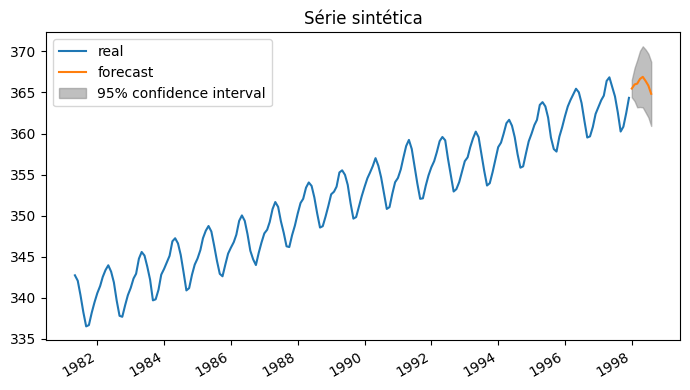

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(df,label='real')
plot_predict(results, start=pd.to_datetime('1998-01-01'), end=pd.to_datetime('1998-08-01'),ax=ax) # alerta: start deve ser ao menos d períodos a frente do início da série
# plot_predict(results, start=1, end=len(ts) + 6,ax=ax) # aqui, funciona o mesmo modo

ax.set_title('Série sintética')
plt.tight_layout()
plt.show()

## 6. Qual o RMSE e MAPE

* Para a série ajustada
* Para as 3 novas predições (hahaha)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Calcular o RMSE
rmse = np.sqrt(mean_squared_error(df.CO2[1::], results.fittedvalues[1::]))

# Calcular o MAPE
mape = mean_absolute_percentage_error(df.CO2[1::], results.fittedvalues[1::])

print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")

RMSE: 0.5612
MAPE: 0.0013
